In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import re
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns # used for plot interactive graph.

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [3]:
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches


In [4]:
%matplotlib inline

In [5]:
data1 = pd.read_csv('googleplaystore.csv')
data2 = pd.read_csv('googleplaystore_user_reviews.csv')

# Explore the datasets

In [6]:
# reading the column names 
data2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [7]:
# reading colmn names
data1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#  from the above table we can see that except 'Rating' column all are in 'Object' format. Changing some columns to numeric sucha as size,install,price& reviews.

In [9]:
data1['App'].value_counts(dropna=False)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [10]:
#checking for duplicates by app name
data1[data1.duplicated('App')].shape[0]

1181

# shorting duplicates in different variable...

In [11]:
# Duplicated rows by App
Duplicate = data1[data1.duplicated('App')]
Duplicate.sort_values(by=['App'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3014,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device


In [12]:
data1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Rating column has many null values. we have to remove those as it is our dependent variable.

In [13]:
missing_value = data1.isnull().sum().sort_values(ascending = False)
missing_perc = (data1.isnull().sum()*100/data1.shape[0]).sort_values(ascending = False)
value = pd.concat([missing_value,missing_perc],axis=1,keys=['Count','%'])
display(value.head(20).style.background_gradient(cmap = 'Reds', axis = 0))

,Count,%
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Type,1,0.009224
Content Rating,1,0.009224
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


In [14]:
# Removes missing values
data1_final = data1.dropna()

In [15]:
data1_final.shape

(9360, 13)

In [16]:
data1_final['Category'].value_counts(dropna=False)

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

# There are so many categories, better to check out different types of encoding - OHE, Count/Frequency Encoding

In [17]:
def freq_encode(x):
    df_frequency_map = data1_final[x].value_counts().to_dict()
    data1_final[x] = data1_final[x].map(df_frequency_map)

In [18]:
freq_encode('Category')

In [19]:
data1_final['Category'].value_counts(dropna=False)

1746    1746
1097    1097
733      733
351      351
350      350
328      328
323      323
319      319
317      317
314      314
312      312
303      303
297      297
259      259
238      238
233      233
226      226
195      195
178      178
160      160
155      155
149      149
124      124
109      109
76        76
75        75
73        73
64        64
61        61
58        58
50        50
45        45
42        42
Name: Category, dtype: int64

In [20]:
data1_final['Current Ver'].value_counts(dropna=False)

Varies with device    1415
1.0                    458
1.1                    194
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [21]:
data1_final['Android Ver'].value_counts(dropna=False)

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1129
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             337
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [22]:
# We can possibly clean this up and use it as one of the features            
def split_it(x):
    non_decimal = re.compile(r'[^\d.]+')
    return non_decimal.sub('', x)
            
data1_final['Android'] = data1_final['Android Ver'].apply(split_it)

In [23]:
def clean_it(x):
    clean = re.compile('\W+')
    return clean.sub('',x)

In [24]:
data1_final['Android'].value_counts(dropna = False)

4.1           2059
              1319
4.0.3         1240
4.0           1129
4.4            881
2.3            582
5.0            535
4.2            337
2.3.3          240
3.0            211
2.2            208
4.3            207
2.1            113
1.6             87
6.0             48
7.0             41
3.2             31
2.0             27
5.1             18
1.5             15
3.1              8
2.0.1            7
8.0              5
7.1              3
4.0.37.1.1       2
5.08.0           2
1.0              2
7.07.1.1         1
4.17.1.1         1
5.06.0           1
Name: Android, dtype: int64

In [25]:
conditions = [
    (data1_final['Android'] == "1.0" ) | (data1_final['Android'] == "1.6" ) | (data1_final['Android'] == "1.5" ),
    
    (data1_final['Android'] == "2.0.1" ) | (data1_final['Android'] == "2.3" ) |(data1_final['Android'] == "2.3.3" ) |
    (data1_final['Android'] == "2.1" ) | (data1_final['Android'] == "2.2" ) | (data1_final['Android'] == "2.0" ),
    
    (data1_final['Android'] == "3.0" ) | (data1_final['Android'] == "3.1" ) | (data1_final['Android'] == "3.2" ),
    
    (data1_final['Android'] == "8.0" ) | (data1_final['Android'] == "7.1" ) | (data1_final['Android'] == "4.0.37.1.1" )|
    (data1_final['Android'] == "5.08.0" ) | (data1_final['Android'] == "7.07.1.1" ) | (data1_final['Android'] == "4.17.1.1" )|
    (data1_final['Android'] == "5.06.0" ) | (data1_final['Android'] == "5.1" ), 
    
    (data1_final['Android'] == "" ) 
    
    ]

choices = ['1','2','3', 'Other', np.nan]
data1_final['Android_ver_final'] = np.select(conditions, choices, default= data1_final['Android'])

In [26]:
data1_final['Android_ver_final'].value_counts(dropna = False)

4.1      2059
NaN      1319
4.0.3    1240
2        1177
4.0      1129
4.4       881
5.0       535
4.2       337
3         250
4.3       207
1         104
6.0        48
7.0        41
Other      33
Name: Android_ver_final, dtype: int64

In [27]:
data1_final['Rating'].value_counts(dropna = False)

4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
4.1     707
4.0     567
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [28]:
data1_final['Reviews'].value_counts(dropna = False)

2         83
3         78
5         74
4         74
1         67
          ..
666521     1
342912     1
4272       1
5517       1
398307     1
Name: Reviews, Length: 5990, dtype: int64

# Visualizing some of the features - Reviews, Ratings etc

In [29]:
data1_final['Reviews']= data1_final['Reviews'].astype(float)

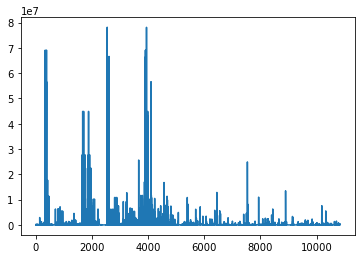

In [30]:
plt.plot(data1_final['Reviews'])

Text(0.5, 1.0, 'Distribution of Reviews')

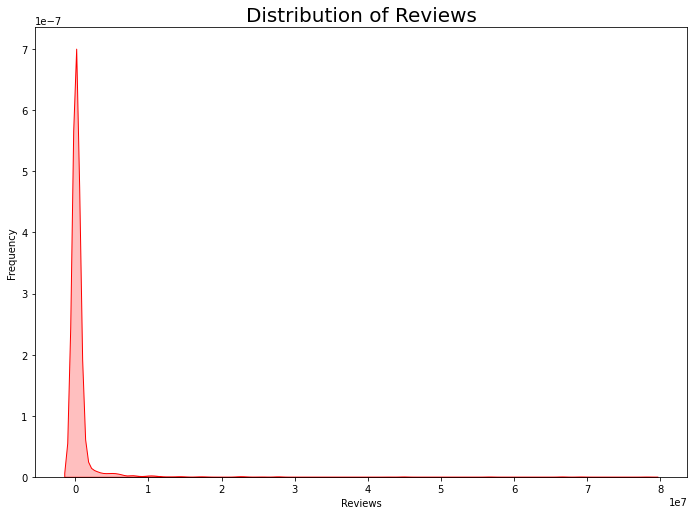

In [31]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data1_final.Reviews, color="Red", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reviews',size = 20)

Text(0.5, 1.0, 'Distribution of Rating')

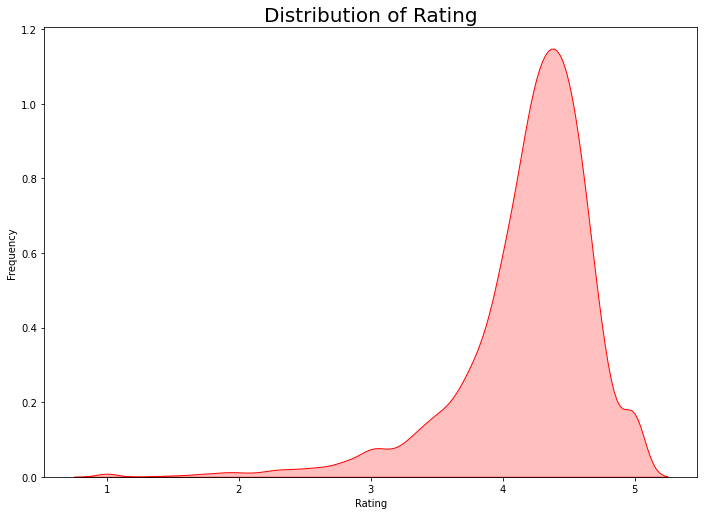

In [32]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data1_final.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

Text(0.5, 0, 'Rating')

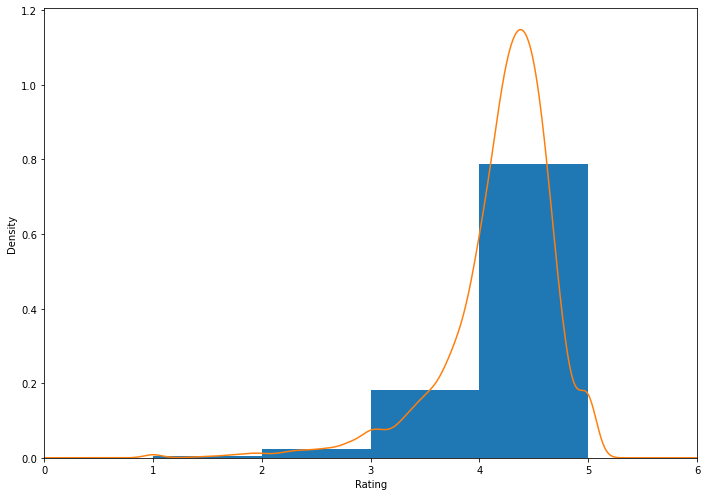

In [33]:
ax = data1_final['Rating'].plot.hist(density=True, xlim=[0,6], bins=range(1,6))
data1_final['Rating'].plot.density(ax=ax)
ax.set_xlabel('Rating')

In [34]:
data1_final['Size'].value_counts(dropna = False)

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [35]:
data1_final['Size_Rev'] = data1_final['Size'].apply(split_it)

In [36]:
data1_final['Size_Rev'].value_counts(dropna = False)

       1637
14      166
12      161
15      159
11      159
       ... 
454       1
812       1
442       1
842       1
619       1
Name: Size_Rev, Length: 378, dtype: int64

In [37]:
data1_final['Size_Rev'] = pd.to_numeric(data1_final['Size_Rev'], errors='ignore')

In [38]:
data1_final['Size_Rev'].describe()

count    7723.00000
mean       37.30707
std        93.54223
min         1.00000
25%         6.10000
50%        16.00000
75%        37.00000
max       994.00000
Name: Size_Rev, dtype: float64

In [39]:
data1_final['Size'].isna().sum()

0

In [40]:
data1_final['Installs'].value_counts(dropna=False)

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [41]:
data1_final['Installs_Rev'] = data1_final['Installs'].apply(clean_it)

In [42]:
data1_final['Installs_Rev'].value_counts(dropna=False)

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs_Rev, dtype: int64

In [43]:
data1_final['Installs_Rev'] = data1_final['Installs_Rev'].astype(int)

In [44]:
data1_final['Installs_Rev'].describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs_Rev, dtype: float64

Text(0.5, 1.0, 'Distribution of Installations')

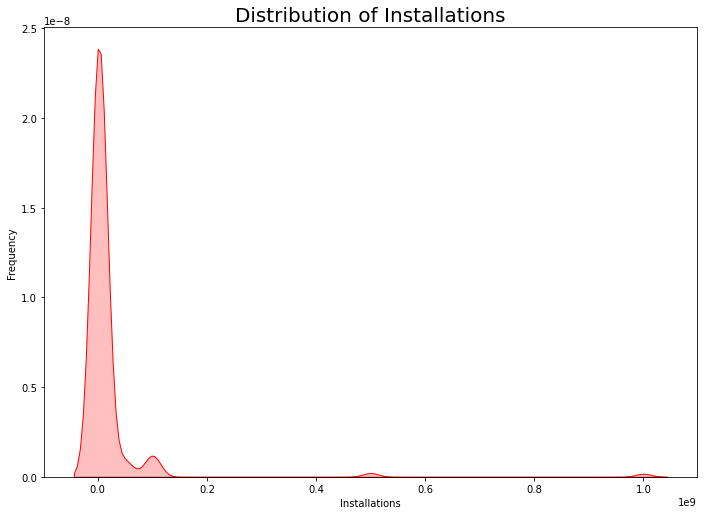

In [45]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data1_final.Installs_Rev, color="Red", shade = True)
g.set_xlabel("Installations")
g.set_ylabel("Frequency")
plt.title('Distribution of Installations',size = 20)

Text(0.5, 1.0, 'The number of categories')

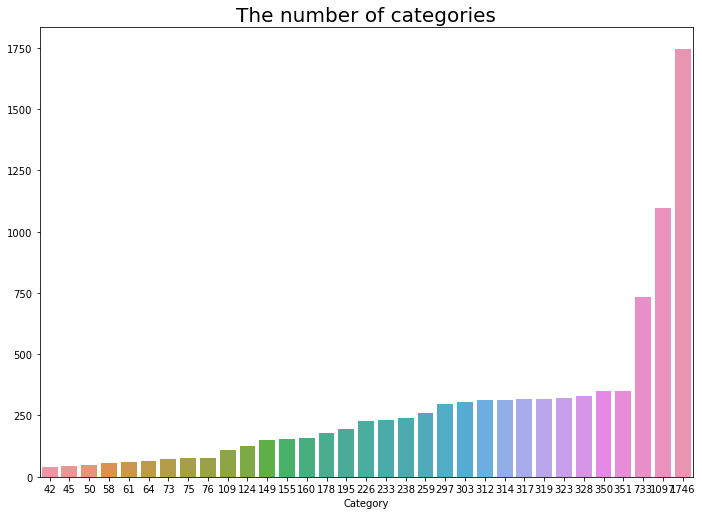

In [46]:
cat_num = data1_final["Category"].value_counts()
sns.barplot(x = cat_num, y = cat_num.index, data = data1_final)
plt.title("The number of categories", size=20)

Text(0.5, 1.0, 'Category & Price')

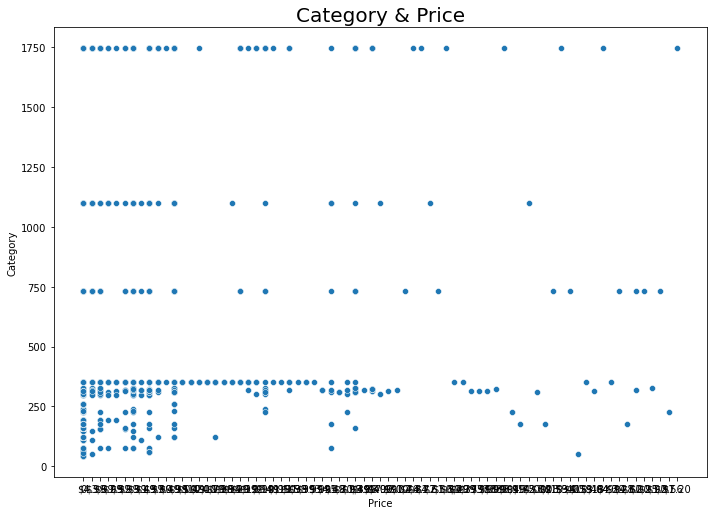

In [47]:
sns.scatterplot(data =  data1_final, y = "Category", x = "Price")
plt.title("Category & Price", size=20)

# Heatmap for numerical columns

Text(0.5, 1.0, 'Heatmap for numerical columns')

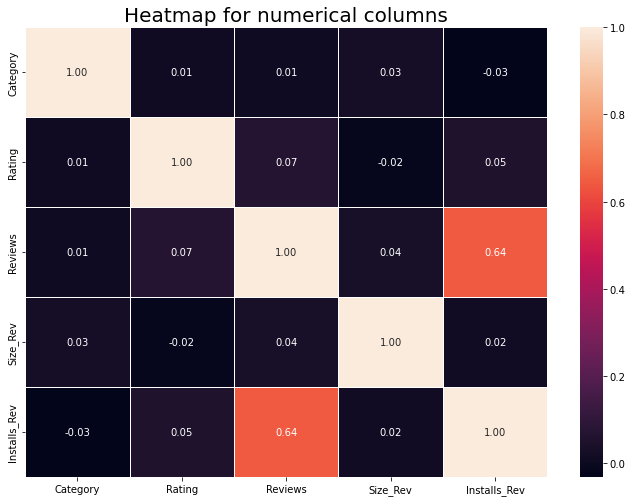

In [48]:
sns.heatmap(data1_final.corr(), annot = True, linewidths=.5, fmt=".2f")
plt.title("Heatmap for numerical columns", size=20)

# Histogram with the kde for the rating column

Text(0.5, 1.0, 'Histogram with the kde for the rating column ')

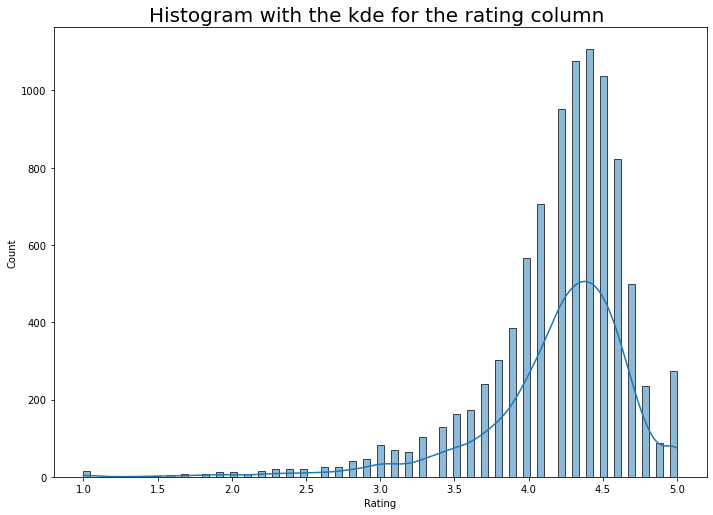

In [49]:
sns.histplot(data1_final["Rating"], kde = True)
plt.title("Histogram with the kde for the rating column ", size=20,)

In [50]:
data1_final['Type'].value_counts(dropna=False)

Free    8715
Paid     645
Name: Type, dtype: int64

In [51]:
data1_final['Price'].describe()

count     9360
unique      73
top          0
freq      8715
Name: Price, dtype: object

In [52]:
data1_final['Price_Rev'] = data1_final['Price'].apply(clean_it)

In [53]:
data1_final['Price_Rev'] = data1_final['Price_Rev'].astype(int)

In [54]:
data1_final['Price_Rev'].describe()

count     9360.000000
mean        96.127885
std       1582.164025
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      40000.000000
Name: Price_Rev, dtype: float64

In [55]:
# Check if all the free apps have Price of ZERO
data1_final.groupby(['Type']).agg({'Price_Rev': ['sum', 'mean']}).round(0)

Price_Rev        
           sum    mean
Type                  
Free         0     0.0
Paid    899757  1395.0

In [56]:
data1_final['Content Rating'].value_counts(dropna=False)

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [57]:
conditions = [
    (data1_final['Content Rating'] == "Mature 17+" ) | (data1_final['Content Rating'] == "Adults only 18+" ) | (data1_final['Content Rating'] == "Unrated" ),
    
    (data1_final['Content Rating'] == "Everyone" ) | (data1_final['Content Rating'] == "Everyone 10+" ) 
    
    ]

choices = ['Adults 18+','Everyone']
data1_final['Content_Rating_final'] = np.select(conditions, choices, default= data1_final['Content Rating'])

In [58]:
data1_final['Content_Rating_final'].value_counts(dropna=False)

Everyone      7811
Teen          1084
Adults 18+     465
Name: Content_Rating_final, dtype: int64

In [59]:
freq_encode("Content_Rating_final")

In [60]:
data1_final['Content_Rating_final'].value_counts(dropna=False)

7811    7811
1084    1084
465      465
Name: Content_Rating_final, dtype: int64

In [61]:
data1_final['Genres'].unique().shape

(115,)

In [62]:
data1_final['Genres'].value_counts(normalize=True).loc[lambda x : x>0.02]

Tools               0.078205
Entertainment       0.056944
Education           0.050000
Action              0.038248
Productivity        0.037500
Medical             0.037393
Sports              0.035577
Communication       0.035043
Finance             0.034509
Photography         0.033868
Lifestyle           0.033440
Personalization     0.033333
Business            0.032372
Health & Fitness    0.031731
Social              0.027671
Shopping            0.025427
News & Magazines    0.024893
Travel & Local      0.024038
Arcade              0.022115
Dating              0.020833
Simulation          0.020726
Name: Genres, dtype: float64

In [63]:
freq_encode("Genres")

In [64]:
data1_final['Genres'].value_counts(normalize=True).loc[lambda x : x>0.02]

732    0.078205
533    0.056944
468    0.050000
358    0.038248
351    0.037500
350    0.037393
333    0.035577
328    0.035043
323    0.034509
317    0.033868
313    0.033440
312    0.033333
303    0.032372
297    0.031731
259    0.027671
238    0.025427
233    0.024893
225    0.024038
207    0.022115
195    0.020833
194    0.020726
Name: Genres, dtype: float64

# We have focused on all the individual features, their distributions and cleaned up each one of those .. The final features that we will be using in the model are 'Rating','Category','Size_Rev','Reviews','Android_ver_final','Installs_Rev','Price_Rev','Content_Rating_final','Genres'

In [65]:
cols = ['Rating','Category','Size_Rev','Reviews','Android_ver_final','Installs_Rev','Price_Rev','Content_Rating_final','Genres']

In [66]:
data_for_model = data1_final[cols]

In [67]:
data_for_model = data_for_model.dropna()

# The problem can be set as a regression or classification problem. We use y as continuous variable for regression. We will use y1 as discrete variable and use it for classification setting

In [68]:
IVs = ['Category','Size_Rev','Reviews','Android_ver_final','Installs_Rev','Price_Rev','Content_Rating_final','Genres']
X = data_for_model[IVs]
y=data_for_model['Rating']

In [69]:
y1 = y.astype(int)

In [70]:
y1.describe()

count    7667.000000
mean        3.757924
std         0.595301
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Rating, dtype: float64

In [71]:
data_for_model.corr()

,Rating,Category,Size_Rev,Reviews,Installs_Rev,Price_Rev,Content_Rating_final,Genres
Rating,1.000000,0.025097,-0.018726,0.079646,0.052157,-0.021285,-0.010007,-0.081369
Category,0.025097,1.000000,0.026011,0.068382,0.037028,0.000662,-0.055887,0.024890
Size_Rev,-0.018726,0.026011,1.000000,0.036432,0.016054,0.018425,0.014853,0.001618
Reviews,0.079646,0.068382,0.036432,1.000000,0.635529,-0.010160,-0.002144,-0.044578
Installs_Rev,0.052157,0.037028,0.016054,0.635529,1.000000,-0.010758,-0.021288,-0.025525
Price_Rev,-0.021285,0.000662,0.018425,-0.010160,-0.010758,1.000000,0.013866,0.018921
Content_Rating_final,-0.010007,-0.055887,0.014853,-0.002144,-0.021288,0.013866,1.000000,0.079634
Genres,-0.081369,0.024890,0.001618,-0.044578,-0.025525,0.018921,0.079634,1.000000


In [72]:
X.describe()

,Category,Size_Rev,Reviews,Installs_Rev,Price_Rev,Content_Rating_final,Genres
count,7667.000000,7667.000000,7.667000e+03,7.667000e+03,7667.000000,7667.000000,7667.000000
mean,712.964523,37.423308,2.944881e+05,8.198583e+06,113.458589,6704.562149,297.154689
std,608.343640,93.858942,1.869616e+06,4.934048e+07,1747.072032,2537.534941,186.740047
min,42.000000,1.000000,1.000000e+00,1.000000e+00,0.000000,465.000000,1.000000
25%,259.000000,6.100000,1.060000e+02,1.000000e+04,0.000000,7811.000000,178.000000
50%,328.000000,16.000000,2.250000e+03,1.000000e+05,0.000000,7811.000000,312.000000
75%,1097.000000,37.000000,3.832000e+04,1.000000e+06,0.000000,7811.000000,351.000000
max,1746.000000,994.000000,4.489389e+07,1.000000e+09,40000.000000,7811.000000,732.000000
